# Workshop DL02: Convolutional Neural Networks*

## Agenda:
- Introduction to CNN   
- Apply CNN to MNIST dataset

Last workshop we have covered how to calssfy the MNIST digits using DNN and achieved roughly 95% accuracy. This weel we will try CNN and will achieve 99% accuracy! 


## Exercises:
- think about why CNN is appropriate for images data
- try different image dataset (e.g. ImageNet, MNIST, places)

*We recommand running this notebook on colab, gcloud or other cloud instance to avoid over-heating you computer.

## What is a CNN?

Last workshop we have seen how a computer sees an image as a bunch of numbers so we won't be repeating here. 

We also know that a DNN transforms the data into a row to feed the layers, but a CNN works very differently. We still have layers, but instead of passing the weighted sum of nodes from the former layer to the next layer, we do something known as **Convolutional Operation**, which is the fundamental building block of CNN.

### Basic Convolutional Operation:
To perform convolutional operation, we use something known as **filter** or **kernel**, which is a weights matrix thing that each layer does element-wise multiplication with. Let's start with a greyscale $5 \times 5$ image for illustration.

For the first element: 
<img src="./img/1.png">

Slide the window by 1 element to the right, and summing the element-wise multiplications results we get 3: 
<img src="./img/2.png"> 

Slide and slide: 

|Slide to the right|Slide to the down left|
|:----------------:|:--------------------:|
|<img src="./img/3.png">|<img src="./img/4.png">|

.

.

.

Slide until the the map is filled: 

<img src="./img/5.png">



Images sources: ©MIT 6.S191: Introduction to Deep Learning [introtodeeplearning.com](http://introtodeeplearning.com/)

Notations: 
- **filter/kernel**: a set of weights, to extract features such as edges; can be manually coded or learned through backpropagation
<img src="./img/filters.png">
- **feature map**: results after filter is applied; different filters will generate different features maps such as sketches of edges. Scroll to the end of notebook for visulization.  

### Convolutions Over Volume
For RBG images, we perform **convolutions over volume**. 
Similar to convolution over one **channel** as above, for RBG images we repeate the convolution operations for each channel and add them up.

<img src="./img/rbgconv.png">

As you can see, we only get one channel using one filter, to get more channels for layers in CNN, we usually apply more filters like this: 

<img src="./img/conv.png">

Notations:
- **channel**: the one-layer matrix that composes images, filters or layers; for example, for a RBG image, it has 3 channels, namely the red, green and blue channels. The number of channel is also known as **depth**. **Do not confuse channel with layer in neural network** as layer refers to layer in the CNN.   
- **height, width**: height and width of images or layers, for example, the image above have height 5 and width 4.

Some properties: 
-  The depth of next layer is equal to the number of filters used in the previous layer.
- The depth of filter must be equal to the depth of layers that it applies to. 


### Modification to Basic Convolutional Operation:
#### Padding:

Have you noticed that when we slide the window of filter in convolutional operation, we have missed out some values on the edges? Recall:

<img src="./img/3_pad.png">

The values on the right edge were not multiplied with the elements on the right on the filter becuase in the next move the window slides to the down left. To fix that, we can do something known as **padding**. 

We usually pad with zeros. Exampe of padding with 1 pad:

|Middle Padding|Left Padding|Right Padding|
|:------------:|:----------:|:-----------:|
|<img src="./img/middlepad.png">|<img src="./img/leftpad.png">|<img src="./img/rightpad.png">|

Other choices of padding:
- **valid padding**: no padding
- **same padding**: pad so the output size is the same as input size

#### Strided Convolution:
Another alternative to basic convolution is to slide the window in more than 1 step. 


### Alternatives to Convolutional Operation:
Despite the name of CNN, the way we construct layers in CNN is not limited to convolutional operations. 
#### Pooling
The idea is to perform some basic calculation (e.g. maximum, mean) over a pool of values in each channel. So it can reduce the number of parameters in the model because no weights in the filter. It also shrinks the layers into much smaller ones and preserves spatial invariance. (Exercise: how?)

<img src="./img/pooling.png">

#### Fully Connected
Most CNNs use fully connected layers. It's done near the end of forward propagation, where we flatten the last box-shape layer, construct a few DNN-like layers, and finally apply softmax activation for classification. For example, if we have a $5 \times 4 \times 32$ layer, then the flattened version is a vector with 640 values. Then the rest is just like DNN.

<img src="./img/fcn.png">

Note: the representation of layer can be different sometimes, but the most common one looks like the one in the above graph, where the image is facing to the right. So we're facing the depth of images and layers.

### So what does each layer do exactly? 
We have covered some of these when we talked about each layer, but here we have summarised for you:
- **Convolution**: learn features through each layer. For example, if we're classifying human faces, from early layers to end layers of CNN, it can learn features from basic ones like edges, spots; to mid level ones like eyes, lips; and to high level ones like facial structure. 
- **Pooling**: reduce dimensionality and preserve spatial invariance 
- **Activation**: introduce non-linearity
- **Fully Connected**: classify input image 

### CNN structure: (Stay with us we're almost done here) 
There are actually no more new concepts anymore. We have covered how we construct the model like the following graph, all we have to do now is to train it through back propagation like we did in DNN (cost function + update parameters).  

<img src="./img/cnn.png">





  

## DNN versus CNN:
- Connectivity: a NN is fully connected if for every node in a layer, it uses all the nodes from its previous layer. DNN is a fully connected neural network except when dropout is used. So for a node in each hidden-layer of DNN, it's connected to all the nodes in the previous layer, whereas a node in layers of CNN can pick up the important patches of inputs. This is also known as **Sparsity of Connections**. 

- Number of Parameters: considering a large image with thousands of pixels, number of parameter of DNN >>>>> those of CNN, and CNN has the advantage of sharing parameters through common filters. 

## Application of CNN:
This part is to show the immense possiblities of CNN. 
- Classification Task: <img src="./img/classification_task.png">

- Image Segmentation:<img src="./img/ImgSeg.png">

Read more [here](https://www.jeremyjordan.me/semantic-segmentation/)

- Object Detection:<img src="./img/ObjDec.png">

Consult our tutors for more details about the MLSA OD project. 

- Image Captioning:<img src="./img/ImgCap.png">

Images sources: ©MIT 6.S191: Introduction to Deep Learning [introtodeeplearning.com](http://introtodeeplearning.com/)

Now let's do some coding!

In [408]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


#### step 1: preparing the data
The ways we prepare the data for DNN and CNN are different due to the difference in structure. 
For example, for RBG image, the input for DNN is 2-dimemsions $( #sample, height*width*3 )$ whereas the input for CNN is 4-dimemsions $( #sample, height, width, 3 )$. 

In [1]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape);print(x_test.shape)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
print(x_train.shape);print(x_test.shape)
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### step 2: designing the neural architecture
Similar to DNN, we need to go through layer configuration, model compling and model training. Except for layers configurations, model compling and training are similar to DNN. 

##### Layer Configuration:
We can add the following layers in our CNN:
- **Convolutional layer**: through `keras.layers.Conv2D`; for example, if we want to create a layer with 32 channels using a $3 \times 3$ filter followed by a relu activation, we can call `Conv2D(filters=32, kernel_size=(3,3), activation='relu')`
- **Pooling layer**: through `MaxPooling2D`, `AveragePooling2D`
- **Fully connected layer**: `Dense` like in DNN

There are 2 ways of defining a model: **sequential API** and **functional API**. 


In [4]:
# method1: sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'), # add in fully connect layers
    Dense(10, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [5]:
# method 2: functional API
from tensorflow.keras import Model
inputs = Input(shape=(28, 28, 1))

x = Conv2D(32, 3, activation='relu')(inputs)
block_1_output = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(block_1_output)
block_2_output = MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(block_2_output)

x = Flatten()(x)

x = Dense(64, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)


model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0     

#### step 3: training the model 

In [329]:
history = model.fit(x_train, y_train, validation_split=0.5, batch_size = 64, 
                    epochs=10)

Train on 30000 samples, validate on 30000 samples
Epoch 1/10
30000/30000 [==============================] - 15s 509us/sample - loss: 0.1510 - acc: 0.9542 - val_loss: 0.1399 - val_acc: 0.9573
Epoch 2/10
30000/30000 [==============================] - 15s 505us/sample - loss: 0.1326 - acc: 0.9591 - val_loss: 0.1261 - val_acc: 0.9606
Epoch 3/10
30000/30000 [==============================] - 15s 505us/sample - loss: 0.1163 - acc: 0.9648 - val_loss: 0.1213 - val_acc: 0.9615
Epoch 4/10
30000/30000 [==============================] - 15s 509us/sample - loss: 0.1068 - acc: 0.9673 - val_loss: 0.1163 - val_acc: 0.9639
Epoch 5/10
30000/30000 [==============================] - 15s 506us/sample - loss: 0.0979 - acc: 0.9701 - val_loss: 0.1055 - val_acc: 0.9673
Epoch 6/10
30000/30000 [==============================] - 15s 516us/sample - loss: 0.0906 - acc: 0.9722 - val_loss: 0.1056 - val_acc: 0.9666
Epoch 7/10
30000/30000 [==============================] - 15s 512us/sample - loss: 0.0838 - acc: 0.9742 

#### step 4: monitoring the performance

In [330]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("we have obtained accuracy of " + str(test_acc))

10000/10000 [==============================] - 2s 194us/sample - loss: 0.0756 - acc: 0.9742
we have obtained accuracy of 0.9742


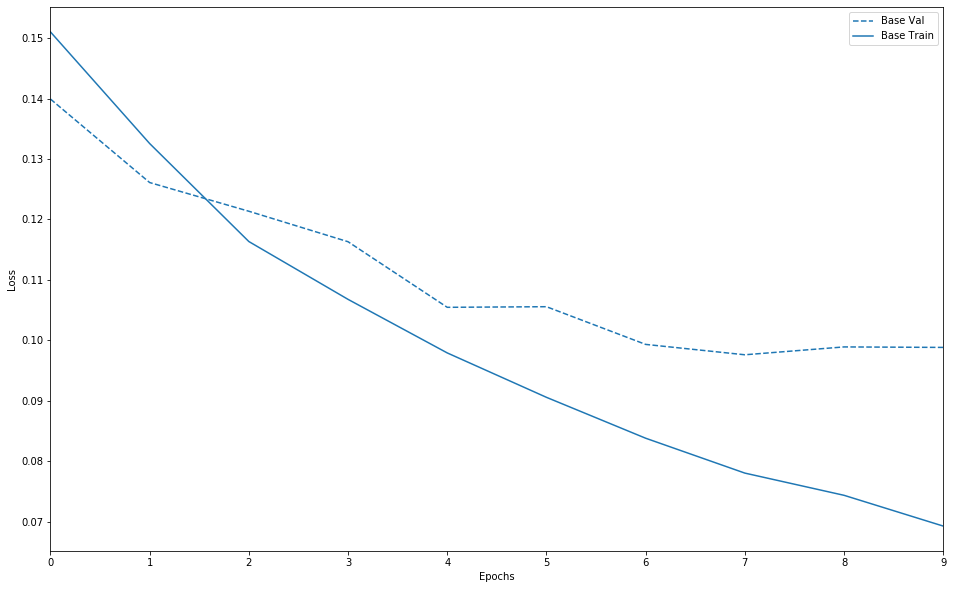

In [331]:
def plot_history(histories, key='loss'): # set key to 'loss' or 'acc' to view metrics
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

plot_history([('base',history)])

#### What the activation layers look like in our model

In [417]:
# importing our image, you can try to import your own image as well 
from PIL import Image
img = Image.open('cat.jpg')
print(img.format)
print(img.mode)
print(img.size)

JPEG
RGB
(256, 256)


uint8
(256, 256, 3)


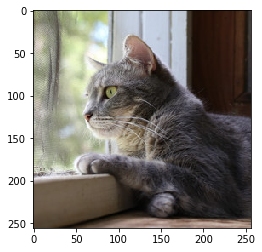

In [432]:
# load and display an image with Matplotlib
from matplotlib import image

# load image as pixel array
img = image.imread('./img/cat.jpg')

# summarize shape of the pixel array
print(img.dtype)
print(img.shape)

# display the array of pixels as an image
pyplot.imshow(img)
pyplot.show()

img = img.reshape((1, 256, 256, 3))
img = img/255.

In [435]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'), # add in fully connect layers
    Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [436]:
layer_outputs = [layer.output for layer in model.layers[:]] 
# Extracts the outputs of all layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) 
# Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img) 
# Returns a list of Numpy array

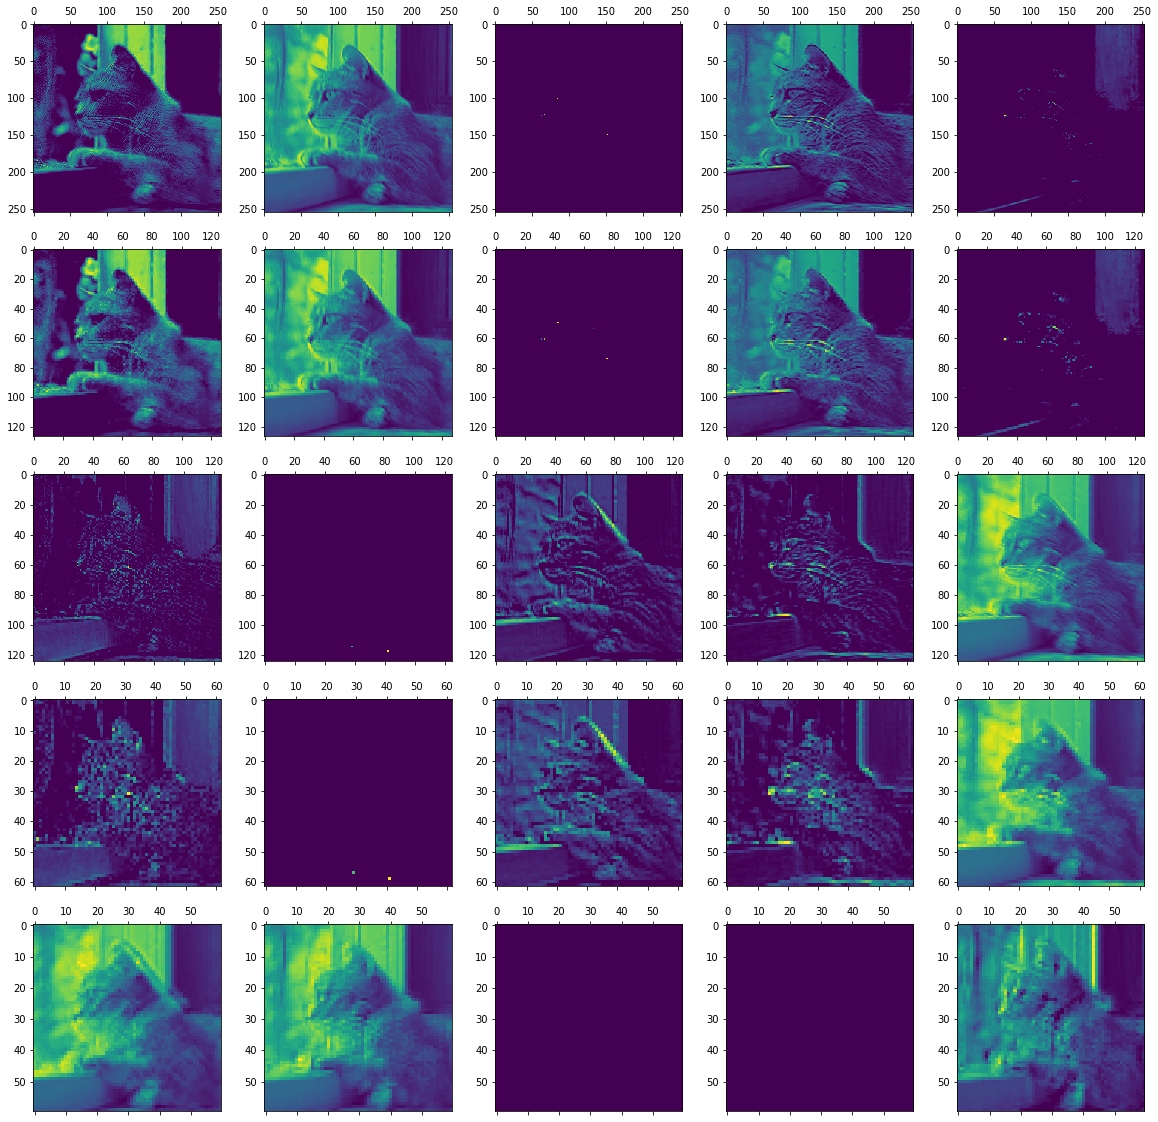

In [437]:
from matplotlib.pyplot import matshow 
fig, axs = plt.subplots(5, 5,figsize = (20,20))

for i in range (5):
    i_layer_activation = activations[i]
    for j in range(5):
        axs[i,j].matshow(i_layer_activation[ 0,:, :, j], cmap='viridis')
        #jth channel in the ith layer

##### How the filter creates feature map

In [438]:
from keras import backend as K
from keras.layers import Layer

# custom filters
def v_edge(shape, dtype=None):
    f = np.array([
            [[[1],[1],[1]], [[0],[0],[0]], [[-1],[-1],[-1]]],
            [[[1],[1],[1]], [[0],[0],[0]], [[-1],[-1],[-1]]],
            [[[1],[1],[1]], [[0],[0],[0]], [[-1],[-1],[-1]]]
        ])
    #assert f.shape == shape
    return K.variable(f, dtype='float32')

def sobel(shape, dtype=None):
    f = np.array([
            [[[1],[1],[1]], [[0],[0],[0]], [[-1],[-1],[-1]]],
            [[[2],[2],[2]], [[0],[0],[0]], [[-2],[-2],[-2]]],
            [[[1],[1],[1]], [[0],[0],[0]], [[-1],[-1],[-1]]]
        ])
    #assert f.shape == shape
    return K.variable(f, dtype='float32')

def scharr(shape, dtype=None):
    f = np.array([
            [[[3],[3],[3]], [[0],[0],[0]], [[-3],[-3],[-3]]],
            [[[10],[10],[10]], [[0],[0],[0]], [[-10],[-10],[-10]]],
            [[[1],[1],[1]], [[0],[0],[0]], [[-1],[-1],[-1]]]
        ])
    #assert f.shape == shape
    return K.variable(f, dtype='float32')


def edge_detector():
    input_tensor = Input(shape=(256,256,3))
    x = layers.Conv2D(1, (3, 3), # creates a layer using edge_filter that gives just one channel
                      kernel_initializer=scharr) (input_tensor)
    model = Model(inputs=input_tensor, outputs=x)
    return model

(254, 254, 1)


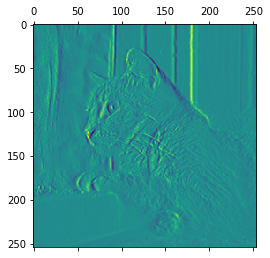

In [439]:
model = edge_detector()
edges = model.predict(img)

# Returns a list of Numpy array
edges = edges[0]
print(edges.shape)

plt.matshow(edges[ :, :,0], cmap='viridis')
# 1st channel of 1st layer 